# Downloading Playing Cards Labelized Dataset from Kaggle

https://www.kaggle.com/hugopaigneau/playing-cards-dataset

In [364]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [365]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) API Token"

In [366]:
%cd /content/drive/My Drive/Colab Notebooks/Machine Learning Projects/Playing Card Classification/Dataset

/content/drive/My Drive/Colab Notebooks/Machine Learning Projects/Playing Card Classification/Dataset


In [367]:
#!kaggle datasets download -d hugopaigneau/playing-cards-dataset

In [368]:
#!unzip 'playing-cards-dataset.zip'

# Import Libraries

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pac
import tensorflow as tf
from tensorflow import keras

In [370]:
train_cards_label = pd.read_csv('train_cards_label.csv')
train_cards_label

,filename,width,height,class,xmin,ymin,xmax,ymax
0,627194074.jpg,1080,1080,9s,82,724,147,752
1,627194074.jpg,1080,1080,Qc,85,584,153,640
2,627194074.jpg,1080,1080,2h,164,470,213,524
3,627194074.jpg,1080,1080,6s,276,380,315,443
4,627194074.jpg,1080,1080,Qd,395,342,433,409
...,...,...,...,...,...,...,...,...
40084,807600334.jpg,1080,1080,6s,162,466,214,523
40085,807600334.jpg,1080,1080,Jc,269,375,319,450
40086,807600334.jpg,1080,1080,8h,398,344,428,405
40087,807600334.jpg,1080,1080,7c,477,349,522,414


# Visualize Dataset with Bounding Box

In [407]:
img.shape

(1080, 1080, 3)

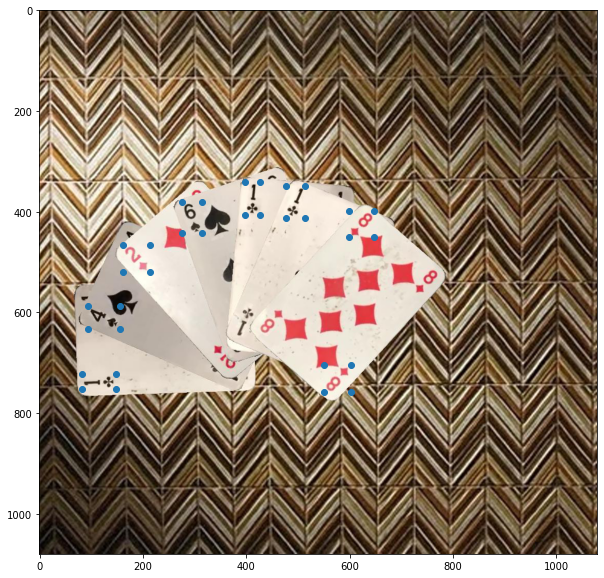

In [371]:
fig, ax = plt.subplots(figsize=(10, 10))
rand_train_cards = np.random.randint(len(train_cards_label))
random_train_img = train_cards_label.iloc[rand_train_cards]
img = plt.imread('train_zipped/' + random_train_img[0])

cards = train_cards_label[train_cards_label['filename'] == random_train_img[0]]
xmin, ymin, xmax, ymax = cards['xmin'], cards['ymin'], cards['xmax'], cards['ymax']

ax.scatter([xmin, xmax, xmin, xmax], [ymin, ymax, ymax, ymin])
ax.imshow(img, aspect='auto')

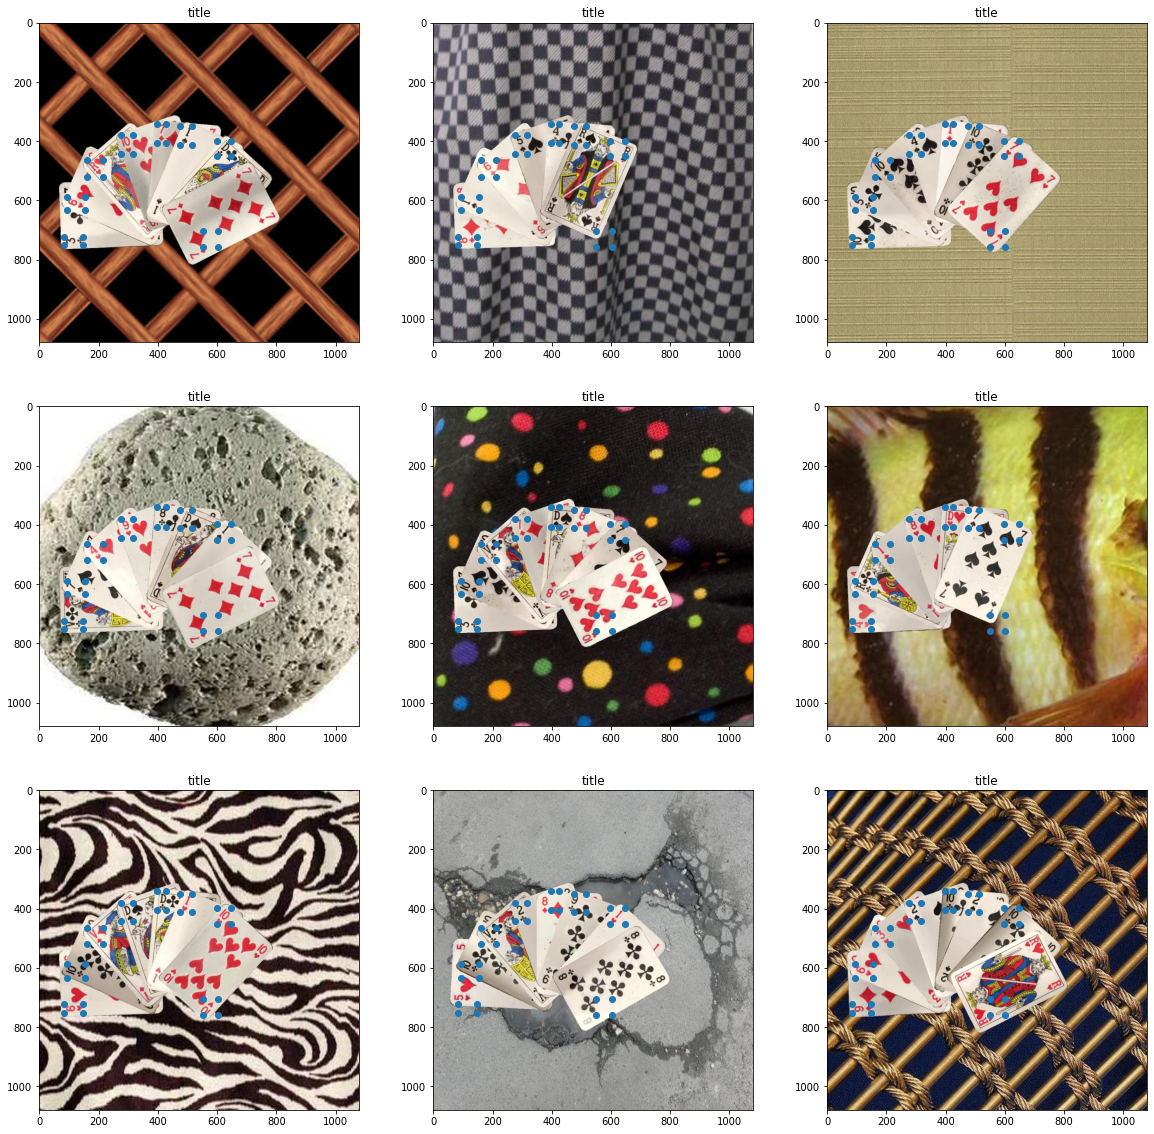

In [392]:
random_img_index = []
img_list = []
cards = train_cards_label[train_cards_label['filename'] == random_train_img[0]]
xmin, ymin, xmax, ymax = cards['xmin'], cards['ymin'], cards['xmax'], cards['ymax']

fig = plt.figure(figsize=(20, 20))

for i in range(9):
  n = np.random.randint(len(train_cards_label))
  random_img_index.append(n)

for i in random_img_index:
  img = plt.imread('train_zipped/' + train_cards_label.iloc[i][0])
  img_list.append(img)

for i in range(len(img_list)):
  fig.add_subplot(3, 3, i + 1)
  plt.gca().set_title('title')
  plt.imshow(img_list[i])
  plt.scatter([xmin, xmax, xmin, xmax], [ymin, ymax, ymax, ymin])

In [ ]:
train_cards_label[train_cards_label['filename'] == random_train_img[0]]

In [ ]:
cards = train_cards_label[train_cards_label['filename'] == random_train_img[0]]

In [ ]:
xmin, ymin, xmax, ymax = cards['xmin'], cards['ymin'], cards['xmax'], cards['ymax']

In [ ]:
xmin

In [ ]:
plt.scatter([xmin, xmax, xmin, xmax], [ymin, ymax, ymax, ymin])

In [ ]:
train_cards_label.iloc[index]['xmax']

Plotting Bounding Box

In [ ]:
plt.scatter(random_train_img[[4, 6, 4, 6]], random_train_img[[5, 7, 7, 5]])

# Creating, Training CNN Model

## 1 Transfer Learning - YoloV3

## 2 Building CNN

In [458]:
model = keras.models.Sequential([
  keras.layers.Conv2D(filters=20, kernel_size=8, strides=1, 
                      padding='Same', activation='relu', 
                      input_shape=(1080,1080,3)),
  keras.layers.MaxPooling2D((2, 2), strides=2),
  keras.layers.Conv2D(filters=20, kernel_size=8, strides=1,
                      padding='Same', activation='relu'),
  keras.layers.MaxPooling2D((2, 2), strides=4),
  keras.layers.Dropout(0.8),
  keras.layers.Dense(52) # 52 Different Cards
  # Output 52 Classes
])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 1080, 1080, 20)    3860      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 540, 540, 20)      0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 540, 540, 20)      25620     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 135, 135, 20)      0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 135, 135, 20)      0         
_________________________________________________________________
dense_20 (Dense)             (None, 135, 135, 52)      1092      
Total params: 30,572
Trainable params: 30,572
Non-trainable params: 0
_________________________________________________

In [469]:
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')

In [461]:
model.compile?